<a href="https://colab.research.google.com/github/valki45/inteligencia-artificial/blob/main/multicapa/flor_del_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cargamos el dataset Iris desde sklearn
# Este conjunto de datos es muy usado para practicar modelos de clasificación.
# Contiene información de 150 flores iris, divididas en tres clases:
# setosa, versicolor y virginica.
from sklearn.datasets import load_iris
iris = load_iris()


In [ ]:
# Muestro las claves (keys) del dataset Iris.
# Esto me permite ver qué información contiene el objeto 'iris', como los datos, nombres de las clases, etc.
print(iris.keys())


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
# Muestro la descripción completa del dataset Iris.
# Esto me da información general sobre las flores, las variables que contiene
# y cuántas muestras hay de cada tipo.
print(iris.DESCR)  # Nos da información de la flor


.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [ ]:
# Muestro los nombres de las clases del dataset.
# Representan los tres tipos de flores iris que hay en el conjunto de datos.
iris.target_names    # ['setosa' 'versicolor' 'virginica']

# Contiene los valores numéricos que indican a qué clase pertenece cada flor.
# 0 = setosa, 1 = versicolor, 2 = virginica.
iris.target

# Contiene los datos numéricos de las características (las mediciones de cada flor).
# Cada fila representa una flor y cada columna una característica.
iris.data

# Muestra los nombres de las características que tiene cada muestra (columnas del dataset).
# Son: largo y ancho del sépalo, y largo y ancho del pétalo.
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# Importo el módulo pandas para manejar los datos en forma de DataFrame.
import pandas as pd

# Creo un DataFrame a partir del dataset Iris.
# 'data=iris["data"]' contiene las características numéricas de cada flor.
# 'columns=iris["feature_names"]' asigna los nombres de las columnas (características del iris).
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

# Este DataFrame permite una mejor visualización de los datos.
# Recordando que:
# - Si el target es 0 → la especie es setosa.
# - Si el target es 1 → la especie es versicolor.
# - Si el target es 2 → la especie es virginica.
iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# Muestro una pequeña descripción estadística del DataFrame.
# Esto incluye el conteo, la media, la desviación estándar,
# los valores mínimos, máximos y los percentiles (25%, 50% y 75%) de cada característica.
iris_df.describe()  # pequeña descripción estadística



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Definimos las variables independientes (X) y la variable objetivo (y).

# X contendrá todas las características numéricas del DataFrame (las medidas de las flores).
X = iris_df

# y contendrá el target, es decir, la especie a la que pertenece cada flor.
# Uso pd.get_dummies() para convertir las clases (0, 1, 2) en formato "one-hot encoding".
# Esto es necesario para que el modelo de red neuronal pueda trabajar correctamente con las etiquetas.
y = pd.get_dummies(iris.target).values


In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba.
# Esto permite entrenar el modelo con una parte de los datos y evaluar su rendimiento con datos nuevos.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # Uso el 20% de los datos para prueba y el 80% para entrenamiento.
    random_state=42     # Fijo una semilla para que la división siempre sea la misma.
)


In [ ]:
# Muestro las dimensiones de los conjuntos de entrenamiento y prueba.
# Esto me permite confirmar que la división se hizo correctamente.

print(X_train.shape)  # Muestra el número de filas y columnas del conjunto de entrenamiento.
print(X_test.shape)   # Muestra el número de filas y columnas del conjunto de prueba.


(120, 4)
(30, 4)


In [ ]:
# Escalamiento de los datos
# Aplico StandardScaler para normalizar las características y que todas estén en la misma escala.
# Esto ayuda a que el modelo aprenda mejor y no dé más importancia a variables con valores mayores.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()          # Creo el objeto escalador.
X_train = scaler.fit_transform(X_train)  # Ajusto el escalador con los datos de entrenamiento y los transformo.
X_test = scaler.transform(X_test)        # Aplico la misma transformación a los datos de prueba.


In [ ]:
# Definimos el modelo de red neuronal

# Importo las librerías necesarias de Keras para construir el modelo.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Creo un modelo secuencial, donde las capas se van añadiendo una tras otra.
modelo = Sequential([
    # Capa de entrada con 64 neuronas y activación ReLU.
    # 'input_shape' indica el número de características (en este caso 4).
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),

    # Segunda capa oculta con 32 neuronas y activación ReLU.
    Dense(32, activation='relu'),

    # Capa de salida con 3 neuronas (una por cada clase del dataset: setosa, versicolor, virginica)
    # y activación softmax para obtener probabilidades.
    Dense(3, activation='softmax'),
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Creamos un optimizador Adam con una tasa de aprendizaje de 0.001

# Importo el optimizador Adam desde Keras.
from tensorflow.keras.optimizers import Adam

# Defino la tasa de aprendizaje deseada (qué tan rápido o lento aprende el modelo).
learning_rate = 0.001

# Creo el optimizador Adam con esa tasa de aprendizaje.
adam_optimizer = Adam(learning_rate=learning_rate)



In [ ]:
# Compilación del modelo

# En esta parte defino cómo se entrenará el modelo:
# - optimizer: uso el optimizador Adam que creé anteriormente.
# - loss: utilizo 'categorical_crossentropy', ideal para problemas de clasificación multiclase.
# - metrics: 'accuracy' para medir qué tan bien predice el modelo durante el entrenamiento.
modelo.compile(
    optimizer=adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
# Entrenamiento del modelo

# Entreno el modelo con los datos de entrenamiento.
# - epochs: número de veces que el modelo pasa por todos los datos.
# - batch_size: número de muestras que procesa antes de actualizar los pesos.
# - validation_data: uso los datos de prueba para evaluar el rendimiento del modelo en cada época.
history = modelo.fit(
    X_train, y_train,
    epochs=10,
    batch_size=1,
    validation_data=(X_test, y_test)
)


Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6903 - loss: 0.7820 - val_accuracy: 0.8667 - val_loss: 0.3791
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7917 - loss: 0.3776 - val_accuracy: 0.9000 - val_loss: 0.2497
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8329 - loss: 0.3139 - val_accuracy: 0.9333 - val_loss: 0.1774
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9413 - loss: 0.1982 - val_accuracy: 0.9667 - val_loss: 0.1434
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9293 - loss: 0.2084 - val_accuracy: 1.0000 - val_loss: 0.1244
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9448 - loss: 0.1727 - val_accuracy: 1.0000 - val_loss: 0.0951
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9924 - loss: 0.1033 - val_accuracy: 1.0000 - val_loss: 0.0727
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9849 - loss: 0.0953 - val_accuracy: 0.

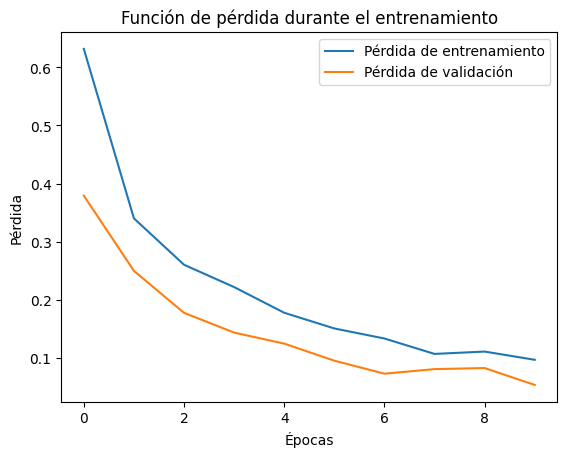

In [ ]:
# Se grafica la función de pérdida

# Importo matplotlib para visualizar cómo evolucionó la pérdida del modelo durante el entrenamiento.
import matplotlib.pyplot as plt

# Grafico la pérdida (loss) tanto del conjunto de entrenamiento como del de validación.
# Esto me ayuda a ver si el modelo está aprendiendo correctamente o si se está sobreajustando.
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


In [ ]:
# Evaluar el modelo en el conjunto de prueba

# Uso el método .evaluate() para medir el rendimiento del modelo con los datos de prueba.
# Esto me devuelve la pérdida (loss) y la precisión (accuracy) final.
loss, accuracy = modelo.evaluate(X_test, y_test)

# Imprimo los resultados para ver qué tan bien generaliza el modelo.
print(f'Loss: {loss}, Accuracy: {accuracy}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 1.0000 - loss: 0.0534
Loss: 0.05337231233716011, Accuracy: 1.0


In [ ]:
#Hacer predicciones y compararlas con los valores reales
import numpy as np
predictions = modelo.predict(X_test)
# Obtener el índice de la clase predicha para cada punto de datos
predicted_classes = np.argmax(predictions, axis=1)
# Obtenemos el índice de la clase real de y_test
actual_classes = np.argmax(y_test, axis=1)

comparison = pd.DataFrame({'Actual Class Index': actual_classes, 'Predicted Class Index': predicted_classes})
# Agregar columnas con los nombres reales y predichos de las flores utilizando iris.target_names
comparison['Actual Flower'] = [iris.target_names[i] for i in actual_classes]
comparison['Predicted Flower'] = [iris.target_names[i] for i in predicted_classes]
# Reordenar las columnas para una mejor visualización
comparison = comparison[['Actual Class Index', 'Actual Flower', 'Predicted Class Index', 'Predicted Flower']]
print(comparison.head())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
   Actual Class Index Actual Flower  Predicted Class Index Predicted Flower
0                   1    versicolor                      1       versicolor
1                   0        setosa                      0           setosa
2                   2     virginica                      2        virginica
3                   1    versicolor                      1       versicolor
4                   1    versicolor                      1       versicolor


In [ ]:
#Calculamos la matriz de confusión y la sensibilidad (recall)
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

y_pred = modelo.predict(X_test)
# Convertir las predicciones a clases
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)
# Calcular la sensibilidad
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 1.0


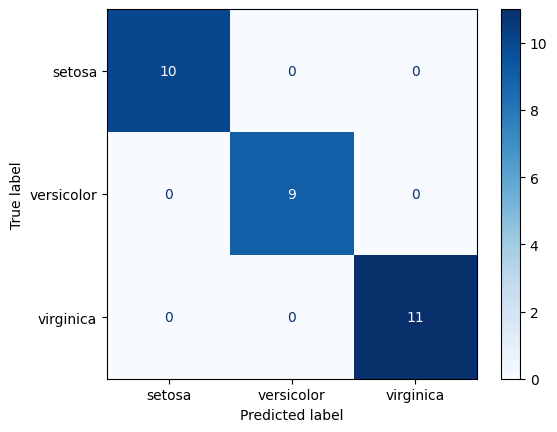

In [ ]:
# Visualizar la matriz de confusión como una imagen de colores
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(3):
    print(f'Class {i}: {sensitivity[i]}')